<a href="https://colab.research.google.com/github/umerspamn/UGD-Machine-Learning/blob/main/youtuber_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import json

# Read JSON file into a Python object
with open('data.json', 'r') as file:
    data = json.load(file)

# Convert the Python object into a DataFrame
df = pd.DataFrame(data)

# Now, df contains your data in a DataFrame format
labels = []
for index, row in df.iterrows():
    # Example of how you might generate labels
    label = (row['viewers'] + row['subscribers']) // 1000  # Example label generation
    labels.append(label)

# Add 'labels' column to DataFrame
df['labels'] = labels




def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[['viewers', 'subscribers', 'instagram_followers', 'facebook_followers', 'tiktok_followers', 'videos_posted']])
    return scaled_data

# Uncomment to preprocess data
preprocessed_data = preprocess_data(df)



In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid') # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model(preprocessed_data.shape[1])


In [33]:
import numpy as np

# Convert labels list to numpy array
labels_array = np.array(labels)

# Example, split your data accordingly
model.fit(preprocessed_data, labels_array, epochs=10, batch_size=32)

def predict_score(model, new_data):
    prediction = model.predict(new_data)
    # Scale the prediction to a 0-10 score as required
    return prediction * 10

# Example usage
score = predict_score(model, preprocessed_data)



Epoch 1/10
3/3 [==============================] - 0s 5ms/step - loss: -1481.9578 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: -1646.6088 - accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: -1837.6105 - accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: -2052.0281 - accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: -2275.5166 - accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: -2527.9316 - accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: -2783.6855 - accuracy: 0.0000e+00
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: -3063.6289 - accuracy: 0.0000e+00
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: -3360.2070 - accuracy: 0.0000e+00
Epoch 10/10
3/3 [==============================] - 0s 4ms/step


In [34]:
print(score)

[[ 9.986599]
 [ 9.999399]
 [ 9.994002]
 [ 9.9998  ]
 [ 9.996924]
 [ 9.998347]
 [ 9.999696]
 [ 9.999069]
 [ 9.9995  ]
 [ 9.999906]
 [ 9.999823]
 [ 9.999961]
 [ 9.999987]
 [ 9.999994]
 [ 9.999997]
 [ 9.999999]
 [ 9.999999]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]
 [10.      ]]


In [35]:
df["score"]=score

In [37]:
df.head()

,viewers,subscribers,instagram_followers,facebook_followers,tiktok_followers,videos_posted,labels,score
0,15000,5000,20000,10000,5000,100,20,9.986599
1,25000,7500,30000,15000,7500,150,32,9.999399
2,18000,6000,22000,11000,5500,110,24,9.994002
3,30000,8000,35000,17000,8000,170,38,9.999800
4,20000,6500,25000,12000,6000,120,26,9.996924


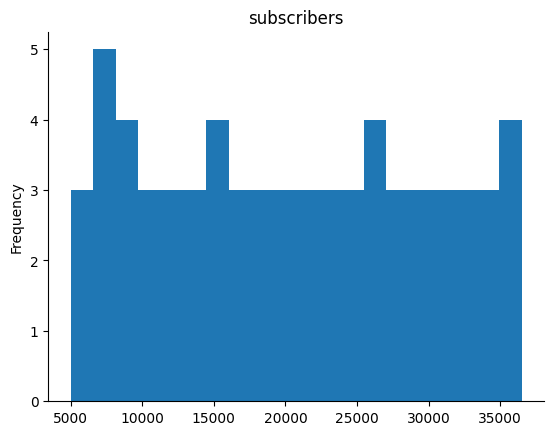

In [38]:
# @title subscribers

from matplotlib import pyplot as plt
df['subscribers'].plot(kind='hist', bins=20, title='subscribers')
plt.gca().spines[['top', 'right',]].set_visible(False)

<function matplotlib.pyplot.show(close=None, block=None)>

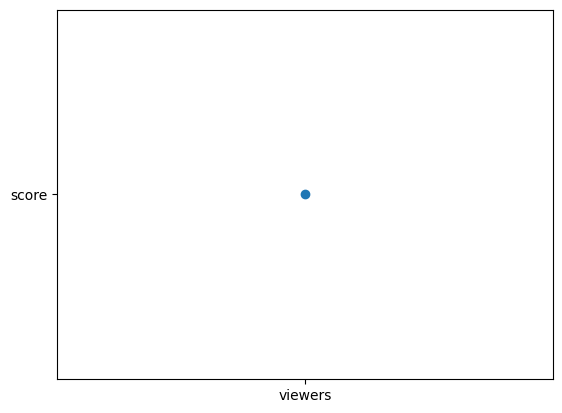

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x="viewers",y="score")
plt.show